In [1]:

import pandas as pd    

# Import Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
# Note - you will need version 0.24.1 of scikit-learn to load this library (SequentialFeatureSelector)
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Import numpy 
import numpy as np

# Another statistic model library
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 20})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2


%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.pop('Unnamed: 32')

data['diagnosis'] = data['diagnosis'].replace('B',0);
data['diagnosis'] = data['diagnosis'].replace('M',1);

y = data.diagnosis
X = data.T
x = X[2:]
x = x.T

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
model  = LogisticRegression().fit(X_train,y_train)

y_predict = model.predict(X_test)
print(r2_score(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
accuracy_1 = np.round(accuracy_score(y_test,y_predict)*100)

0.8132983950212905
0.043859649122807015


/Users/sdogg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:

sfs_forward = SequentialFeatureSelector(LogisticRegression(), 
                                        n_features_to_select=4,
                                        direction='forward').fit(x, y)

f_names = np.array(data.columns)
selected = sfs_forward.get_support(indices=True)
print("Selected input features using Forward Stepwise Selection:\n", f_names[selected])
columns_names = list(f_names[selected])

if 'diagnosis' in columns_names:
    columns_names.remove('diagnosis')
if 'id' in columns_names:
    columns_names.remove('id')
print(columns_names)

/Users/sdogg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected input features using Forward Stepwise Selection:
 ['id' 'symmetry_mean' 'fractal_dimension_se' 'radius_worst']
['symmetry_mean', 'fractal_dimension_se', 'radius_worst']


In [6]:
x_manip = data[columns_names]

y = data.diagnosis

X_train_manip, X_test_manip, y_train_2, y_test_2 = train_test_split(x_manip, y, test_size=0.2, random_state=42)

In [45]:
model_2  = LogisticRegression().fit(X_train_manip,y_train_2)
y_predict_2 = model_2.predict(X_test_manip)
r2_2 = r2_score(y_test_2,y_predict_2)
print(mean_squared_error(y_test_2,y_predict_2))
accuracy_2 = np.round(accuracy_score(y_test_2,y_predict_2)*100)
print(accuracy_2)


0.06140350877192982
94.0


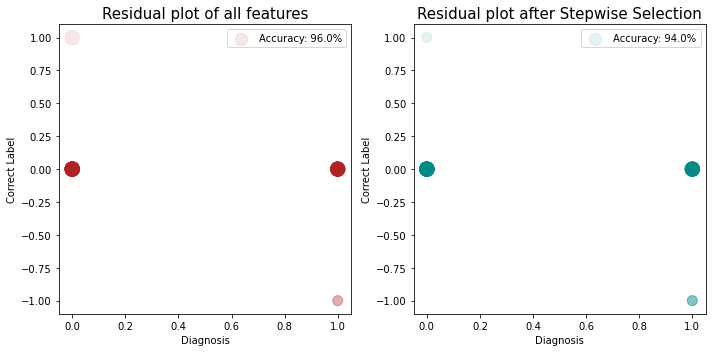

In [56]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(y_test, y_predict - y_test, marker='o',s=(200-(100*abs(y_predict_2-y_test_2))),alpha=0.1,c= 'FireBrick',label = "Accuracy: "+str(accuracy_1)+"%")
ax[0].set_title('Residual plot of all features', fontsize=15)
ax[0].set_xlabel('Diagnosis')
ax[0].set_ylabel('Correct Label')
ax[0].legend()

ax[1].scatter(y_test_2, y_predict_2 - y_test_2,s=(200-(100*abs(y_predict_2-y_test_2))),alpha=0.1,c= 'DarkCyan',label = "Accuracy: "+str(accuracy_2)+"%")
ax[1].set_title('Residual plot after Stepwise Selection', fontsize=15)
ax[1].set_xlabel('Diagnosis')
ax[1].set_ylabel('Correct Label')
ax[1].legend()

plt.tight_layout()